## 使用梯度上升发求解主成分
> **注意与线性回归无关，这是两个特征**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

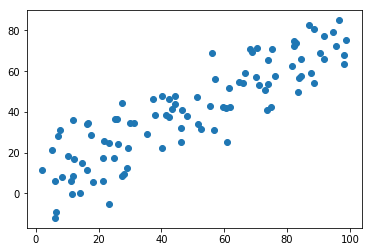

In [3]:
plt.scatter(X[:, 0 ], X[:, 1])
plt.show()

## demean

In [4]:
def demean(X): #数据减去平均值，使计算更加容易
    return X - np.mean(X, axis=0) #求出每一列的均值

In [5]:
X_demean = demean(X)

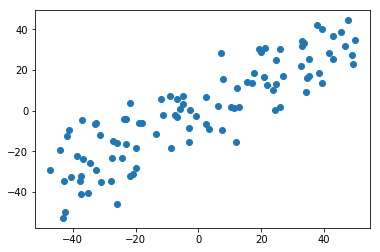

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

## 梯度上升法实现

<img src='./picture/1-7.png' style='float:middle'>
<img src='./picture/2-3.png' style='float:middle'>

In [7]:
def f(w, X): #目标函数
    return np.sum((X.dot(w)**2)) / len(X) 

In [8]:
def df_math(w, X): #求梯度
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [9]:
def direction(w): #将w化为单位向量
    return w / np.linalg.norm(w) #调用norm函数求出w的模


In [10]:
def gradient_ascent(df, X, initial_w, eta,n_iters = 1e4 ,epsilon=1e-10): #实现梯度上升法
   
    w = direction(initial_w)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #注意1：每次求一个单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        i_iter += 1
        
    return w

In [11]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能从0向量开始, 注意生成二维向量的写法

In [12]:
initial_w

array([0.30246511, 0.09684091])

In [13]:
# 注意3 ：不能使用standardScaler标准化数据， 这样方差恒为1
gradient_ascent(df_math, X_demean, initial_w, eta=0.001)

array([0.78673048, 0.61729665])

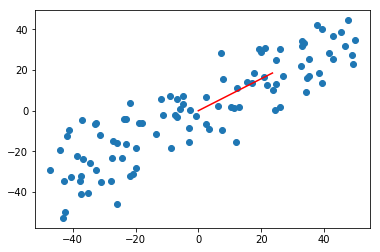

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta=0.001)
plt.scatter(X_demean[:,0] , X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1]*30], color='r')
plt.show()

---

In [15]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3

In [18]:
X_demean = demean(X)

In [19]:
gradient_ascent(df_math, X_demean, initial_w, eta=0.001)

array([0.80000002, 0.59999997])

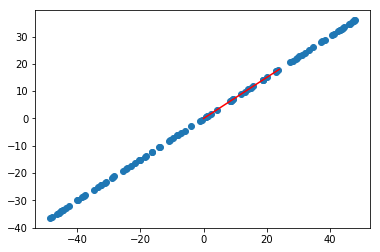

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta=0.001)
plt.scatter(X_demean[:,0] , X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1]*30], color='r')
plt.show()